In [1]:
import numpy as np
from scipy.stats import binom
from numpy.random import binomial
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [2]:
def my_binomial(k,n,p):
    return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p,n-k)

In [62]:
my_binomial(2,3,0.5)

0.375

In [6]:
dist=binom(3,0.5)
dist.pmf(2)

0.3750000000000001

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [69]:
dist.pmf(2)


0.3750000000000001

In [11]:
dist.cdf(2)

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [124]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

0

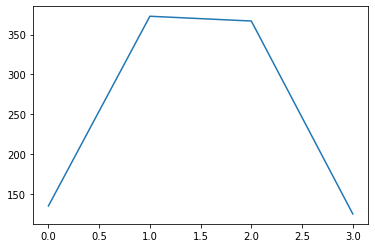

In [122]:
arr=[]
for _ in range(1000):
    arr.append(binomial(n,p))
count=np.unique(arr,return_counts=True)
count

plt.plot(count[0],count[1])

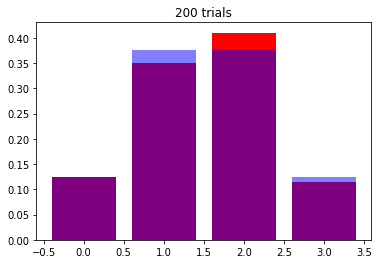

In [128]:


def plot_hist(num_trials):
    n=3
    p=0.5
    values=[0,1,2,3]
    arr=[]
    for _ in range(num_trials):
        arr.append(binomial(n,p))
    sim=np.unique(arr,return_counts=True)[1]/len(arr)
    theory=[binom(3,0.5).pmf(k) for k in values]
    plt.bar(values,sim,color="red")
    plt.bar(values,theory,alpha=0.5,color="blue")
    plt.title("{} trials".format(num_trials))
    plt.show()

plot_hist(200)

In [126]:
np.unique(arr,return_counts=True)


(array([0, 1, 2, 3]), array([135, 373, 367, 125]))